In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scanpy as sc
import spatialdata as sd
from napari_spatialdata import Interactive

/Users/macbook/miniconda3/envs/ome/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Users/macbook/miniconda3/envs/ome/lib/python3.10/site-packages/geopandas/_compat.py:123: UserWarning: The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
/Users/macbook/embl/projects/basel/spatialdata/src/spatialdata/__init__.py:9: UserWarning: Geopandas was set to use PyGEOS, changing to shapely 2.0 with:

	geopandas.options.use_pygeos = True

If you intended to use PyGEOS, set the option to False.
  _check_geopandas_using_shapely()


In [2]:
f = "spatialdata-sandbox/cosmx_io/data.zarr"
assert os.path.exists(f)

In [3]:
sdata = sd.read_zarr(f)
sdata

SpatialData object with:
├── Images
│     ├── '1_image': SpatialImage[cyx] (3, 3648, 5472)
│     ├── '2_image': SpatialImage[cyx] (3, 3648, 5472)
│     ├── '3_image': SpatialImage[cyx] (3, 3648, 5472)
│     ├── '4_image': SpatialImage[cyx] (3, 3648, 5472)
│     ├── '5_image': SpatialImage[cyx] (3, 3648, 5472)
│     ├── '6_image': SpatialImage[cyx] (3, 3648, 5472)
│     ├── '7_image': SpatialImage[cyx] (3, 3648, 5472)
│     ├── '8_image': SpatialImage[cyx] (3, 3648, 5472)
│     ├── '9_image': SpatialImage[cyx] (3, 3648, 5472)
│     ├── '10_image': SpatialImage[cyx] (3, 3648, 5472)
│     ├── '11_image': SpatialImage[cyx] (3, 3648, 5472)
│     ├── '12_image': SpatialImage[cyx] (3, 3648, 5472)
│     ├── '13_image': SpatialImage[cyx] (3, 3648, 5472)
│     ├── '14_image': SpatialImage[cyx] (3, 3648, 5472)
│     ├── '15_image': SpatialImage[cyx] (3, 3648, 5472)
│     ├── '16_image': SpatialImage[cyx] (3, 3648, 5472)
│     ├── '17_image': SpatialImage[cyx] (3, 3648, 5472)
│     ├── '18_image':

/Users/macbook/miniconda3/envs/ome/lib/python3.10/site-packages/scanpy/preprocessing/_normalization.py:197: UserWarning: Some cells have zero counts
  warn(UserWarning('Some cells have zero counts'))


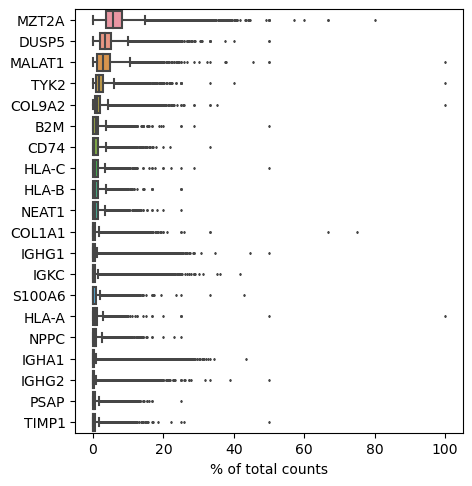

In [4]:
adata = sdata.table
plt.style.use("default")
sc.pl.highest_expr_genes(
    adata,
    n_top=20,
)

In [5]:
sc.pp.calculate_qc_metrics(adata, percent_top=None, log1p=False, inplace=True)

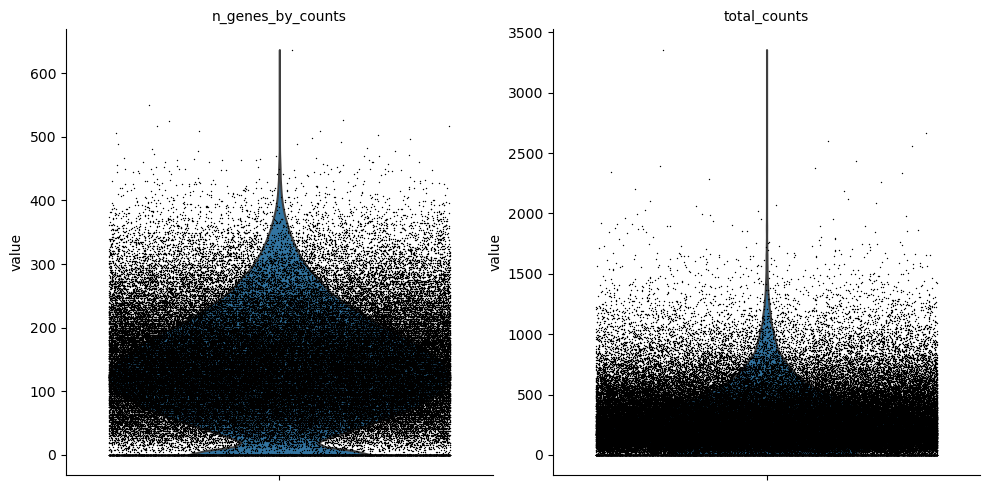

In [6]:
sc.pl.violin(adata, ["n_genes_by_counts", "total_counts"], jitter=0.4, multi_panel=True)

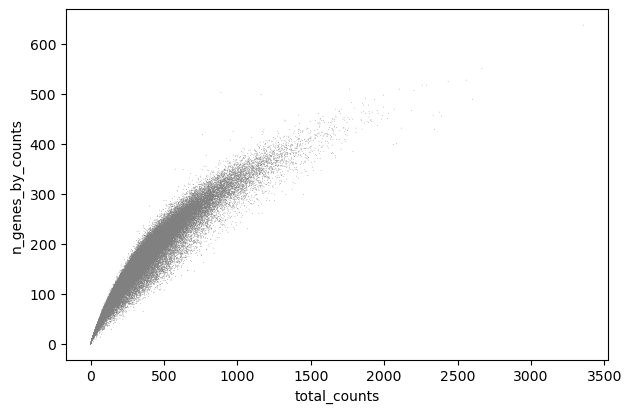

In [7]:
sc.pl.scatter(adata, x="total_counts", y="n_genes_by_counts")

In [8]:
sc.pp.normalize_total(adata, target_sum=1e4)

/Users/macbook/miniconda3/envs/ome/lib/python3.10/site-packages/scanpy/preprocessing/_normalization.py:197: UserWarning: Some cells have zero counts
  warn(UserWarning('Some cells have zero counts'))


In [9]:
sc.pp.log1p(adata)

In [10]:
sc.tl.pca(adata)

In [11]:
adata.var_names

Index(['AATK', 'ABL1', 'ABL2', 'ACE', 'ACE2', 'ACKR1', 'ACKR3', 'ACKR4',
       'ACTA2', 'ACTG2',
       ...
       'NegPrb14', 'NegPrb15', 'NegPrb16', 'NegPrb17', 'NegPrb18', 'NegPrb19',
       'NegPrb20', 'NegPrb21', 'NegPrb22', 'NegPrb23'],
      dtype='object', length=980)

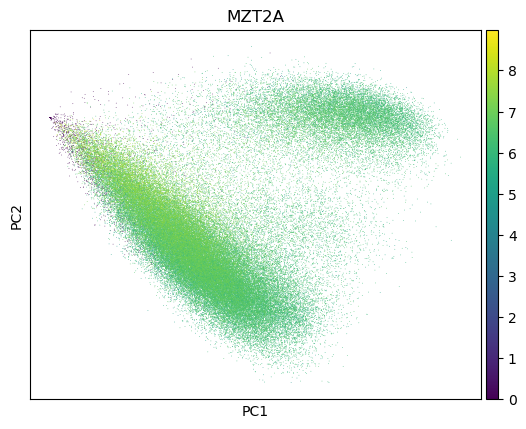

In [12]:
sc.pl.pca(adata, color="MZT2A")

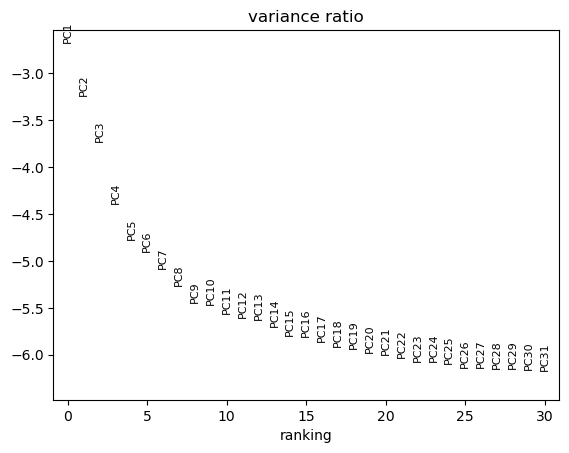

In [13]:
sc.pl.pca_variance_ratio(adata, log=True)

In [14]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [15]:
sc.tl.umap(adata)

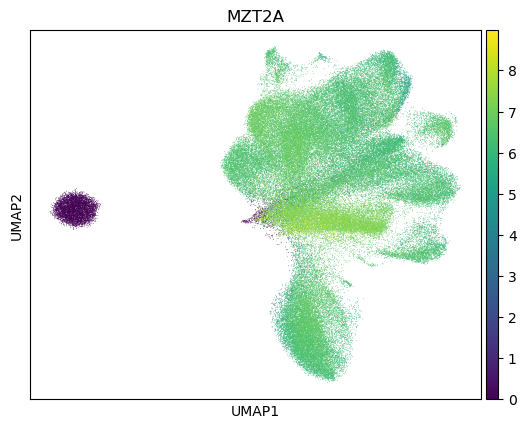

In [16]:
sc.pl.umap(adata, color="MZT2A", use_raw=False)

In [17]:
sc.tl.leiden(adata)

/Users/macbook/miniconda3/envs/ome/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


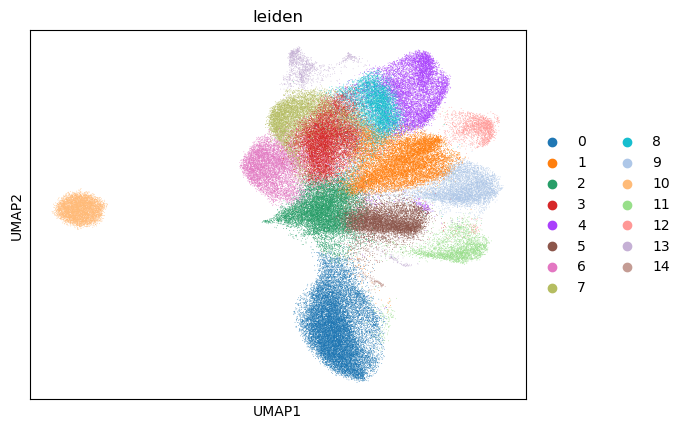

In [18]:
sc.pl.umap(adata, color="leiden")

In [ ]:
Interactive(sdata)

import napari

napari.run()